# Predictive modeling: Any violation

## 1. Import libraries and data

In [1]:
# Data handling and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
%matplotlib inline 

## Machine learning libraries
from sklearn import datasets, metrics
from sklearn.preprocessing import LabelEncoder as le
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score,mean_absolute_error, accuracy_score, roc_curve, roc_auc_score, f1_score, recall_score, average_precision_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import missingno as msno


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
chelsea_df = pd.read_csv('chelsea_clean.csv', low_memory=False, index_col=0)

In [12]:
chelsea = chelsea_df.copy()
chelsea.shape

(1611, 109)

In [13]:
chelsea_all = pd.read_csv('chelsea_all.csv', low_memory = False, index_col = 0)

In [14]:
chelsea.head(2)

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,test parcels,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,high_risk_violation,any_high_risk,violation_total,any_violation,overcrowding_risk,any_overcrowding_risk,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0,0.0,0.0,3.526985,5.607991,0.60206,0.30103,2.0,1.0,4.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0,0.0,0.0,4.126618,5.928703,0.00000,0.00000,4.0,1.0,15.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


## 2. Prepare the data for modelling

In [15]:
# Drop predictive variables 
chelsea.drop(columns=['violation_total', 'high_risk_violation', 'any_high_risk', 'overcrowding_risk', 'any_overcrowding_risk'], inplace = True)

In [16]:
# Number of test and train parcels
print('The number of train parcels is ' + str(chelsea[chelsea['test parcels'] == 0].shape[0]))
print('The number of test parcels is ' + str(chelsea[chelsea['test parcels'] == 1].shape[0]))


The number of train parcels is 1263
The number of test parcels is 348


In [17]:
# Determining the train and test splits
X_train = chelsea[chelsea['test parcels'] == 0].drop(columns=['any_violation', 'test parcels'])
X_test = chelsea[chelsea['test parcels'] == 1].drop(columns=['any_violation', 'test parcels'])
y_train = chelsea[chelsea['test parcels'] == 0][['any_violation']]
y_test = chelsea[chelsea['test parcels'] == 1][['any_violation']]

In [18]:
X_train.head()

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0.0,0.0,3.526985,5.607991,0.602060,0.301030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0.0,0.0,4.126618,5.928703,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,750.0,2.0,1.0,0,370600.0,6.0,4180.0,3.0,0.035825,0,1900.0,1.0,0.0,3.621176,5.568905,0.778151,0.477121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,699400.0,0.0,12366.0,0.0,0.084192,0,1910.0,0.0,0.0,4.092229,5.844726,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,300000.0,5.0,100.0,1.0,0.0,0,439300.0,4.0,5197.0,4.0,0.071424,1,1890.0,1.0,0.0,3.715753,5.642761,0.602060,0.602060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_lasso = scaler.transform((X_train))

scaler.fit(X_test)
X_test_lasso = scaler.transform((X_test))


In [20]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1263, 102) (1263, 1)
(348, 102) (348, 1)


In [21]:
X_train.head()

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0.0,0.0,3.526985,5.607991,0.602060,0.301030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0.0,0.0,4.126618,5.928703,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,750.0,2.0,1.0,0,370600.0,6.0,4180.0,3.0,0.035825,0,1900.0,1.0,0.0,3.621176,5.568905,0.778151,0.477121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,699400.0,0.0,12366.0,0.0,0.084192,0,1910.0,0.0,0.0,4.092229,5.844726,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,300000.0,5.0,100.0,1.0,0.0,0,439300.0,4.0,5197.0,4.0,0.071424,1,1890.0,1.0,0.0,3.715753,5.642761,0.602060,0.602060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [22]:
y_train.head()

,any_violation
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [23]:
X_train_lasso

array([[-0.59221287, -0.35029821, -0.258502  , ..., -0.5066719 ,
         0.        ,  0.        ],
       [ 1.39441356, -0.35029821, -0.258502  , ...,  1.97366381,
         0.        ,  0.        ],
       [-0.59221287, -0.35029821, -0.20225945, ...,  1.97366381,
         0.        ,  0.        ],
       ...,
       [-0.59221287, -0.35029821,  0.81010653, ..., -0.5066719 ,
         0.        ,  0.        ],
       [-0.59221287, -0.35029821, -0.20225945, ..., -0.5066719 ,
         0.        ,  0.        ],
       [ 0.40110035, -0.35029821, -0.14601689, ..., -0.5066719 ,
         0.        ,  0.        ]])

## 3. Select the most appropriate model through CV

### 3.1 Random forest

In [15]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(average_precision_score(y_test, y_pred))
print('number predicted : ' + str(y_pred.sum())) 

0.5059586185065112
number predicted : 162.0


In [15]:
# Random forest parameter tuning
forest = RandomForestClassifier(random_state = 1)

n_estimators = [100, 300, 500]
max_depth = [1, 2, 5, 8, 15, 25]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 5, 10] 
max_features = ["log2", "sqrt"]
criterion = ["gini", "entropy"] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, max_features = max_features, criterion=criterion)

gridF = GridSearchCV(forest, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF = gridF.fit(X_train, y_train)


Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 40.2min finished


In [16]:
print(gridF.best_params_)
print(gridF.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.7424836822487002


In [17]:
# Second grid search
n_estimators = [200, 250, 300, 350, 400]
max_depth = [10, 12, 15, 18]
min_samples_split = [3, 4, 5, 7]
min_samples_leaf = [1] 
max_features = ["log2"]
criterion = ["entropy"]

hyperF2 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, max_features=max_features,
             min_samples_leaf = min_samples_leaf, criterion=criterion)

gridF2 = GridSearchCV(forest, hyperF2, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF2 = gridF2.fit(X_train, y_train)



Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.7min finished


In [18]:
print(gridF2.best_params_)
print(gridF2.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.7424836822487002


In [19]:
# Second grid search
n_estimators = [275, 300, 325]
max_depth = [13, 14, 15, 16, 17]
min_samples_split = [5, 6]
min_samples_leaf = [1] 
max_features = ['log2']
criterion = ["entropy"]

hyperF3 = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, max_features=max_features,
             min_samples_leaf = min_samples_leaf, criterion=criterion)

gridF3 = GridSearchCV(forest, hyperF3, cv = 5, verbose = 1, 
                      n_jobs = -1, scoring='average_precision')
bestF3 = gridF3.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


In [20]:
print(gridF3.best_params_)
print(gridF3.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 325}
0.7426193699419588


In [25]:
random_forest = RandomForestClassifier(max_depth = 15, n_estimators=325, max_features='log2', min_samples_leaf=1, min_samples_split=5, criterion='entropy', random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = average_precision_score(y_test, y_pred)
print(acc_random_forest)
print('number predicted : ' + str(y_pred.sum())) 

0.5581659719590755
number predicted : 203.0


### 3.2 XGBoost

In [16]:
xgb_model=xgb.XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

y_pred2 = xgb_model.predict(X_test)
xgb_score = average_precision_score(y_test, y_pred2)
xgb_score

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5424824217927666

In [24]:
hyperB1 = {"n_estimators" : range(50, 400, 50),
          "learning_rate" : [0.05, 0.1, 0.3]}

gridB1 = GridSearchCV(xgb_model, hyperB1, cv = 5, n_jobs =-1, verbose = 1, scoring='average_precision')
bestB1 = gridB1.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:  1.3min finished


In [25]:
print(gridB1.best_params_)
print(gridB1.best_score_)

{'learning_rate': 0.05, 'n_estimators': 100}
0.7283673374897829


In [26]:
hyperB2 = {"n_estimators" :  range(25, 150, 25),
          "learning_rate" : [0.05, 0.1, 0.3]}

gridB2 = GridSearchCV(xgb_model, hyperB2, cv = 5, n_jobs=-1, verbose = 1, scoring='average_precision')
bestB2 = gridB2.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   26.6s finished


In [27]:
print(gridB2.best_params_)
print(gridB2.best_score_)

{'learning_rate': 0.1, 'n_estimators': 75}
0.7299341283634652


In [28]:
hyperB3 = {"learning_rate"    : [0.05] ,
          'n_estimators'     : [75],
 "max_depth"        : [ 1, 3, 4, 5, 6, 8, 10, 15],  
 "min_child_weight" : [ 1, 3, 5, 7],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7, 1],
  "subsample"       : [0.5, 0.75, 1]}

gridB3 = GridSearchCV(xgb_model, hyperB3, cv = 5, n_jobs = -1, verbose = 1, scoring='average_precision')
bestB3 = gridB3.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | elapsed: 50.9min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 

In [29]:
print(gridB3.best_params_)
print(gridB3.best_score_)

{'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 75, 'subsample': 1}
0.7376263608818701


In [30]:
hyperB4 = {
 "learning_rate"    : [0.05] ,
 'n_estimators'     : [75],
 "max_depth"        : [2, 5, 7],  
 "min_child_weight" : [6, 7, 9, 11],
 "gamma"            : [0.3],
 "colsample_bytree" : [0.6, 0.7, 0.8], 
 "subsample"        : [1]}

gridB4 = GridSearchCV(xgb_model, hyperB4, cv = 5, verbose = 1, scoring='average_precision')
bestB4 = gridB4.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.3min finished


In [31]:
print(gridB4.best_params_)
print(gridB4.best_score_)

{'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 9, 'n_estimators': 75, 'subsample': 1}
0.7398082031397756


In [32]:
hyperB5 = {
 "learning_rate"    : [0.05] ,
 'n_estimators'     : [75],
 "max_depth"        : [5],  
 "min_child_weight" : [9],
 "gamma"            : [0.3],
 "colsample_bytree" : [0.7], 
 "subsample"        : [1],
 "lambda"           : [0.1, 0.3, 0.5, 0.7, 1],
 "alpha"            : [0.1, 0.3, 0.5, 0.7, 1]
}

gridB5 = GridSearchCV(xgb_model, hyperB5, cv = 5, verbose = 1, scoring='average_precision')
bestB5 = gridB5.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   58.7s finished


In [33]:
print(gridB5.best_params_)
print(gridB5.best_score_)

{'alpha': 0.1, 'colsample_bytree': 0.7, 'gamma': 0.3, 'lambda': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 9, 'n_estimators': 75, 'subsample': 1}
0.7398082031397756


In [27]:
xgb_model = xgb.XGBClassifier(
    n_estimators = 75, 
    max_depth = 5, 
    min_child_weight = 9, 
    colsample_bytree = 0.7, 
    subsample = 1,
    gamma = 0.3, 
    alpha = 0.1,
    reg_lambda = 0.1,
    learning_rate = 0.01,
    random_state=1)
xgb_model.fit(X_train, y_train)
y_pred2 = xgb_model.predict(X_test)
acc_xgb = average_precision_score(y_test, y_pred2)
print(acc_xgb)
print('number predicted : ' + str(y_pred2.sum())) 

0.5273541114058355
number predicted : 192.0


C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### 3.3 LASSO

In [28]:
# Fitting the LASSO with the lambda found by CV
lasso = Lasso()
lasso.fit(X_train_lasso, y_train)
lasso_pred = lasso.predict((X_test_lasso))
lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
lasso_pred = pd.DataFrame(lasso_pred)
print(average_precision_score(y_test, lasso_pred))
print('number predicted : ' + str(lasso_pred.sum())) 

0.4482758620689655
number predicted : 0    348
dtype: int64


In [29]:
# First iteration

alpha = np.linspace(0.01,0.06,30)
best_i = []
best_i_score = 0


for i in alpha:
    lasso = Lasso(alpha = i)
    kf = KFold(n_splits=5)
    kf_scoring = []
    for train_index, test_index in kf.split(X_train_lasso):
        X_train_kf, X_test_kf = X_train_lasso[train_index], X_train_lasso[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        lasso.fit(X_train_kf, y_train_kf)
        lasso_pred = lasso.predict(X_test_kf)
        lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
        lasso_pred = pd.DataFrame(lasso_pred)
        kf_scoring.append(average_precision_score(y_test_kf, lasso_pred)*100)
    print(str(round(i,5)) + ' ' +  str(np.mean(kf_scoring)))
    if np.mean(kf_scoring) > best_i_score:
        best_i = i
        best_i_score = np.mean(kf_scoring)

print('The best possible lambda, based on 5-fold CV is: ' + str(best_i))

0.01 62.86158526529766
0.01172 62.55005417068723
0.01345 62.62367931861577
0.01517 62.50775648376448
0.0169 62.347025999081076
0.01862 61.88058883927526
0.02034 61.91828324172445
0.02207 61.54012613452829
0.02379 61.152517768245005
0.02552 61.54599149453238
0.02724 61.18584691637709
0.02897 61.143104934791396
0.03069 61.31074877202623
0.03241 61.233082645913534
0.03414 60.848716576587734
0.03586 60.875468422573974
0.03759 60.95326706037853
0.03931 60.718876398522504
0.04103 60.6648729423013
0.04276 60.6648729423013
0.04448 60.541231938489055
0.04621 60.541231938489055
0.04793 60.62547582066357
0.04966 60.39557712161858
0.05138 59.996025885647065
0.0531 59.940236157225726
0.05483 59.63709111886639
0.05655 59.24468902536897
0.05828 59.24468902536897
0.06 59.039725595782876
The best possible lambda, based on 5-fold CV is: 0.01


In [30]:
# Second iteration

alpha = np.linspace(0.0001, 0.01,30)

for i in alpha:
    lasso = Lasso(alpha = i)
    kf = KFold(n_splits=5)
    kf_scoring = []
    for train_index, test_index in kf.split(X_train_lasso):
        X_train_kf, X_test_kf = X_train_lasso[train_index], X_train_lasso[test_index]
        y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
        lasso.fit(X_train_kf, y_train_kf)
        lasso_pred = lasso.predict(X_test_kf)
        lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
        lasso_pred = pd.DataFrame(lasso_pred)
        kf_scoring.append(average_precision_score(y_test_kf, lasso_pred)*100)
    print(str(round(i,5)) + ' - ' +  str(np.mean(kf_scoring)))
    if np.mean(kf_scoring) > best_i_score:
        best_i = i
        best_i_score = np.mean(kf_scoring)

print('The best possible lambda, based on 5-fold CV is: ' + str(best_i))

0.0001 - 64.6207248918636
0.00044 - 64.70761173120857
0.00078 - 64.68916817029628
0.00112 - 64.51732765738464
0.00147 - 64.53018245820766
0.00181 - 64.51415821282892
0.00215 - 64.48317333491494
0.00249 - 64.5216847944262
0.00283 - 64.42064754457473
0.00317 - 64.55128326112633
0.00351 - 64.41612746861286
0.00386 - 64.21593034808936
0.0042 - 64.05476545580424
0.00454 - 63.987443867161105
0.00488 - 64.05476545580424
0.00522 - 63.78523892565115
0.00556 - 63.72085769890312
0.0059 - 63.5420571456724
0.00624 - 63.482221900383294
0.00659 - 63.134249536744605
0.00693 - 63.11592287851359
0.00727 - 62.93554501910737
0.00761 - 62.63723552266741
0.00795 - 62.63543520585411
0.00829 - 62.702326161721906
0.00863 - 62.832277884908066
0.00898 - 62.87955588099728
0.00932 - 62.94868332220617
0.00966 - 62.74993863851073
0.01 - 62.86158526529766
The best possible lambda, based on 5-fold CV is: 0.0004413793103448276


In [31]:
# Fitting the LASSO with the lambda found by CV
lasso = Lasso(alpha = best_i)
lasso.fit(X_train_lasso, y_train)
lasso_pred = lasso.predict((X_test_lasso))
lasso_pred = np.where(lasso_pred > 0.5, 1, 0)
lasso_pred = pd.DataFrame(lasso_pred)
lasso_score = average_precision_score(y_test, lasso_pred)
print(lasso_score)
print('number predicted : ' + str(lasso_pred.sum())) 

0.5041352706900464
number predicted : 0    226
dtype: int64


## 4. Comparing all the models

In [32]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Lasso'],
    'Score': [acc_random_forest, acc_xgb, lasso_score]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,0.558166
1,XGBoost,0.527354
2,Lasso,0.504135


In [33]:
# Create a function for quick summary of the relevant metrics

def summary(y_test, y_pred, model_name = ''):
    confusion_matrix = (metrics.confusion_matrix(y_test, y_pred))
    ave_precision = average_precision_score(y_test, y_pred)
    acc = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print(model_name + '\n')
    print(str(confusion_matrix) + '\n')
    print('Average Precision Score: ' + str(round(ave_precision, 2)))
    print('Accuracy: ' + str(round(acc, 2)))
    print('Recall (tp/tp+fn): ' + str(round(recall, 2)))
    print('Precision (tp/tp+fp): ' + str(round(precision, 2)))
    print('F1 score: ' + str(round(f1, 2)))
    
    print('\n')


In [34]:
summary(y_test, y_pred2, model_name='XGBoost')
summary(y_test, y_pred, model_name='Random Forest')
summary(y_test, lasso_pred, model_name='LASSO')


XGBoost

[[108  84]
 [ 48 108]]

Average Precision Score: 0.53
Accuracy: 0.62
Recall (tp/tp+fn): 0.69
Precision (tp/tp+fp): 0.56
F1 score: 0.62


Random Forest

[[109  83]
 [ 36 120]]

Average Precision Score: 0.56
Accuracy: 0.66
Recall (tp/tp+fn): 0.77
Precision (tp/tp+fp): 0.59
F1 score: 0.67


LASSO

[[ 84 108]
 [ 38 118]]

Average Precision Score: 0.5
Accuracy: 0.58
Recall (tp/tp+fn): 0.76
Precision (tp/tp+fp): 0.52
F1 score: 0.62




LASSO: ROC AUC=0.653
XGBoost: ROC AUC=0.688
Random Forest: ROC AUC=0.706
No Skill: ROC AUC=0.500


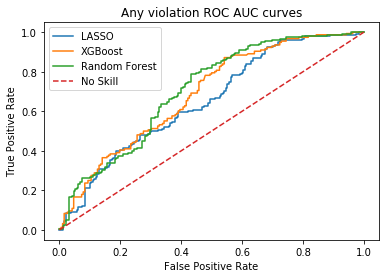

In [41]:
# roc-auc
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = random_forest.predict_proba(X_test)
rf_probs = rf_probs[:,1]
xgb_probs = xgb_model.predict_proba(X_test)
xgb_probs = xgb_probs[:, 1]
lasso_probs = lasso.predict(X_test_lasso)


lasso_auc = roc_auc_score(y_test, lasso_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ns_auc = roc_auc_score(y_test, ns_probs)


print('LASSO: ROC AUC=%.3f' % (lasso_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('No Skill: ROC AUC=%.3f' % (ns_auc))


lasso_fpr, lasso_tpr, _ = roc_curve(y_test, lasso_probs)
plt.plot(lasso_fpr, lasso_tpr, label='LASSO')

xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, label='Random Forest')

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Any violation ROC AUC curves')


plt.savefig('Any violation - ROC AUC.png')

plt.show()




C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBoost: f1=0.621 auc=0.608
Random Forest: f1=0.669 auc=0.616
LASSO: f1=0.620 auc=0.569


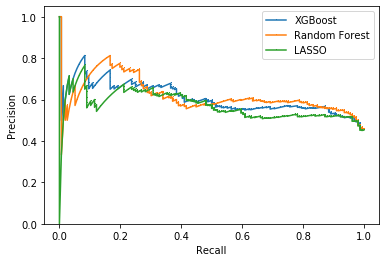

In [46]:
# predict xgboost class values
xgb_probs = xgb_model.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]
yhat = xgb_model.predict(X_test)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, yhat), auc(xgb_recall, xgb_precision)


# predict random forest class values
rf_probs = random_forest.predict_proba(X_test)
rf_probs = rf_probs[:,1]
yhat = random_forest.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)


# predict LASSO class values
lasso_probs = lasso.predict(X_test_lasso)
yhat = lasso.predict(X_test)
yhat = np.where(yhat > 0.5, 1, 0)
lasso_precision, lasso_recall, _ = precision_recall_curve(y_test, lasso_probs)
lasso_f1, lasso_auc = f1_score(y_test, yhat), auc(lasso_recall, lasso_precision)




print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
print('LASSO: f1=%.3f auc=%.3f' % (lasso_f1, lasso_auc))

plt.plot(xgb_recall, xgb_precision, marker=',', label='XGBoost')
plt.plot(rf_recall, rf_precision, marker=',', label='Random Forest')
plt.plot(lasso_recall, lasso_precision, marker=',', label='LASSO')



# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')


# show the legend
plt.legend()

# show the plot
plt.ylim(ymin=0)


plt.savefig('Any violation - Precision Recall AUC.png')
plt.show()


## 5. Display the feature importances of best model

In [43]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                                                        ascending=False)
feature_importances.head(20)

,importance
log_building_size,0.061521
Building Size,0.059653
Total Assessed Value,0.058384
Land Size,0.057681
log_assessed_value,0.054454
40U Violations - Count,0.044459
Property Sales - Price,0.042202
40U Violations - Fine,0.041145
Fire Incidents - Count,0.034114
Year Built,0.034032


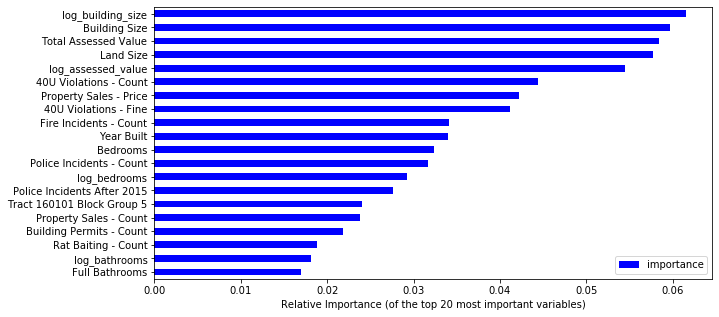

In [47]:
importances = feature_importances[:20].iloc[::-1]
importances.plot.barh(color='b', align='center', figsize=(10,5))
ax = plt.xlabel('Relative Importance (of the top 20 most important variables)')

plt.savefig('Any violation - Feature importances.png')


### 6. Export the results

In [48]:
chelsea_all_predict = chelsea_all.drop(columns=['Parcel ID', 'Address', 'Target Area', 'any_coh'])
chelsea_all_predict.head(2)

,Building Permits - Count,See Click Fix - Count,Fire Incidents - Count,Foreclosure Sales - Count,Vacant Foreclosed Properties,Property Sales - Count,Property Sales - Price,40U Violations - Count,40U Violations - Fine,Police Incidents - Count,Rat Baiting - Count,Tax Title,Total Assessed Value,Bedrooms,Building Size,Full Bathrooms,Land Size,Owner Occupied,Year Built,test parcels,Police Incidents After 2015,log_land_size,log_building_size,log_assessed_value,log_bedrooms,log_bathrooms,high_risk_violation,any_high_risk,violation_total,any_violation,overcrowding_risk,any_overcrowding_risk,APT 4-UNIT MDL-94,APT 4-UNT MDL-94,APT OVER 8 MDL-94,CHAR HOUSING C,CHAR HOUSING R,Condo NL MDL-00,Condo NL MDL-05,HOUSING AUTHORITY C,OFFICE BLD MDL-96,STORE/SHOP MDL-96,Single Fam MDL-94,TWO FAMILY MDL-94,TWO FAMILY MDL-96,Accessory Land with Improvement,Apartments with Four to Eight Units,"Dept. of Education (DOE) - UMass., State Colleges, Community Colleges",Developable Residential Land,General Office Buildings,"Housing, Other (Charitable Org.)","Mixed Use (Primarily Commercial, some Industrial)","Mixed Use (Primarily Commercial, some Residential)","Mixed Use (Primarily Residential, some Commercial)",Multiple Houses on one parcel,Other Congregate Housing (includes non-transient shared living arrangements),Rooming and Boarding Houses,Single Family Residential,Three-Family Residential,Two-Family Residential,Undevelopable Residential Land,n use,Tract 160101 Block Group 1,Tract 160101 Block Group 2,Tract 160101 Block Group 3,Tract 160101 Block Group 4,Tract 160101 Block Group 5,Tract 160200 Block Group 1,Tract 160200 Block Group 2,Tract 160200 Block Group 3,Tract 160300 Block Group 1,Tract 160300 Block Group 2,Tract 160400 Block Group 1,Tract 160400 Block Group 2,Tract 160501 Block Group 1,Tract 160501 Block Group 2,Tract 160501 Block Group 3,Tract 160501 Block Group 4,Tract 160501 Block Group 5,Tract 160502 Block Group 1,Tract 160502 Block Group 2,Tract 160502 Block Group 3,Tract 160601 Block Group 1,Tract 160601 Block Group 2,Tract 160602 Block Group 1,Tract 160602 Block Group 2,Tract 160602 Block Group 3,Tract 160602 Block Group 4,Tract 160602 Block Group 5,Tract 170100 Block Group 3,Tract 342101 Block Group 4,Tract 342600 Block Group 1,owner_occupied__0,owner_occupied__1,fuel__Coal or Wood,fuel__Electric,fuel__Gas,fuel__Oil,heat__Electr Basebrd,heat__Floor Furnace,heat__Forced Air-Duc,heat__Hot Air-no Duc,heat__Hot Water,heat__None,heat__Steam,opportunity_zone__None,opportunity_zone__Tract 160200,opportunity_zone__Tract 160400,analyze
0,0.0,0.0,0.0,0.0,0.0,1.0,260000.0,4.0,100.0,0.0,0.0,0,405500.0,4.0,3365.0,2.0,0.115141,1,1893.0,0,0.0,0.0,3.526985,5.607991,0.60206,0.30103,2.0,1.0,4.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,250.0,0.0,0.0,0,848600.0,0.0,13385.0,0.0,0.090972,0,1920.0,0,0.0,0.0,4.126618,5.928703,0.00000,0.00000,4.0,1.0,15.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1.0


In [49]:
final_predictions = pd.DataFrame(xgb_model.predict_proba(chelsea_all_predict.drop(columns=['violation_total', 'high_risk_violation', 'any_high_risk', 'overcrowding_risk', 'any_violation', 'test parcels', 'any_overcrowding_risk'])))
chelsea_all['probability of violation'] = final_predictions[1]
chelsea_all[['Parcel ID', 'Address', 'probability of violation']].to_csv('final_predictions_any_violatins.csv')